In [48]:
import random
import networkx as nx
from matplotlib import pyplot as plt, animation
import numpy as np
import itertools
import pandas as pd

In [24]:
def generate_random_city_graph(connection_prob=0.1, min_weight=1, max_weight=100):
    """
    Generate a random graph representing cities connected with weighted edges.

    Parameters:
    - num_cities (int): Number of cities (nodes) in the graph.
    - connection_prob (float): Probability of a connection (edge) between any two cities.
    - min_weight (int): Minimum weight (distance) for the edges.
    - max_weight (int): Maximum weight (distance) for the edges.

    Returns:
    - G (networkx.Graph): A NetworkX graph with cities as nodes and weighted edges.
    """
    num_cities = random.randint(20,26) # Generate just from 20 to 26 because I want only alphabet characters as nodes
    # Generate random city names (A, B, C, ...)
    city_names = [chr(65 + i) for i in range(num_cities)]

    # Create a graph
    G = nx.Graph()

    # Add cities as nodes
    G.add_nodes_from(city_names)

    # Randomly connect cities with random weights (distances)
    for i in range(num_cities):
        for j in range(i + 1, num_cities):
            weight = random.randint(min_weight, max_weight)  # Random distance
            G.add_edge(city_names[i], city_names[j], weight=weight)

    return G

In [25]:
# Example usage
random_graph = generate_random_city_graph()

In [26]:
def draw_graph(G):
    """
    Draw the generated graph with cities and weighted connections.

    Parameters:
    - G (networkx.Graph): The graph to be drawn.
    """
    pos = nx.spring_layout(G)
    edges = G.edges(data=True)

    # Clear any previous plot
    plt.clf()
    
    # Draw the graph
    nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=5, font_weight='bold')
    #nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in edges})
    #nx.draw_networkx_edge(G, pos, with_labels=False)

    plt.title("Graph")
    plt.show()
    return pos

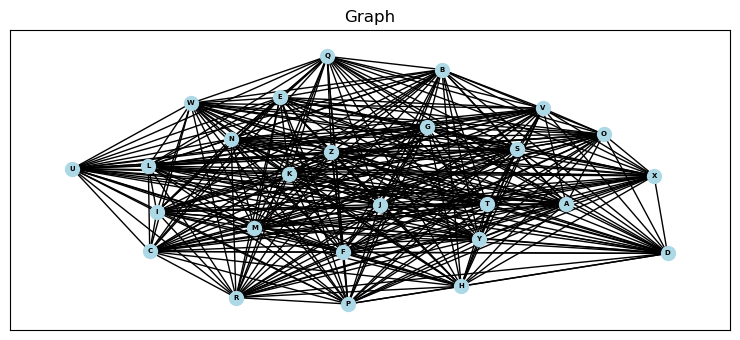

In [27]:
originalLayout = draw_graph(random_graph)

In [28]:
def generatePopulation(G, populationSize):
    populations = []
    nodes = list(G.nodes)
    for i in range(0, populationSize): 
        population = random.sample(nodes, len(nodes))
        population.append(population[0]) # append first element of array because he needs to end where he started
        populations.append(population)
    return populations
def evaluateAll(G, population):
    distances = []
    for solution in population:
        distance = evaluate(G, solution)
        distances.append(distance)
    return distances
def evaluate(G, x):
    # x represents a way which is gonna be list of all edges, first and last edge will be the same
    totalDistance = 0
    for i in range(0,len(x) - 1): # All edges except the last one because it doesnt go anywhere
        fromIndex = x[i]
        toIndex = x[i+1]
        totalDistance += G[fromIndex][toIndex]["weight"]
    return totalDistance
def crossover(x, y):
    #Need to make sure that x and y are lists, for some reason I started to get numpyarrays but not sure why
    x = list(x)
    y = list(y)
    #print(f"typ: {type(y)} content: {y}")
    j = random.randint(0, len(x) - 2) # -1 for bounds control of index and -1 because randint generation includes both of bounds numbers
    offspring = x[0:j+1]
    for i in range(j + 1, len(x) - 1): # Last member has to be same as first
        if y[i] not in offspring:
            offspring.append(y[i])
        else:
            for k in range(j,-1,-1): # We want to include even first element because the start and end is taken from first parent, not the second one
                if y[k] not in offspring:
                    offspring.append(y[k])
                    break
    offspring.append(offspring[0])
    #print(f"Velikost x: {len(x)} Velikost y: {len(y)} Velikost potomka: {len(offspring)}")
    return offspring
def mutate(x):
    randI = random.randint(1,len(x) - 2) # - 2 for index bounds and we dont want to swap last element
    randJ = random.randint(1,len(x) - 2)
    while randI == randJ: # Make sure we pick different indices
        randJ = random.randint(1, len(x) - 2)
    tmp = x[randI]
    x[randI] = x[randJ]
    x[randJ] = tmp
    return x
def GeneticAlgorithm(G):
    NP = 20
    gen = 200
    D = len(G.nodes)
    population = generatePopulation(G, NP)
    evaluationsPopulation = evaluateAll(G, population)
    for i in range(0,gen):
        new_population = np.copy(population)
        for j in range(0,NP):
            parent_A = population[j]
            listOfIndices = list(range(0,NP))
            listOfIndices.remove(j) # Possible indices withou j index to ensure we dont pick same index
            randomIndex = random.randint(0,NP - 2) # Go from 0 to NP - 2, because of bounds and one element is removed
            parent_B = population[randomIndex] # Random population
            offspring_AB = crossover(parent_A, parent_B)
            if np.random.uniform() < 0.5:
                offspring_AB = mutate(offspring_AB)
            offspringVal = evaluate(G, offspring_AB) #Evaluate offspring_AB
            if offspringVal < evaluationsPopulation[j]:
                #print(f"Index: {len(G.nodes)} new_population: {new_population[j]} new_population2: {new_population[randomIndex]} offspring: {offspring_AB}")
                new_population[j] = offspring_AB # Update population
                evaluationsPopulation[j] = offspringVal # Update distance for new population
        population = new_population
    return population
        

In [29]:
#evaluate(random_graph, list(random_graph.nodes))
populations = generatePopulation(random_graph, 5)

In [30]:
offspring = crossover(populations[0], populations[1])

In [31]:
len(random_graph.nodes)

26

In [32]:
print(f" p0: {populations[0]}\n p1: {populations[1]}\n of: {offspring}")

 p0: ['W', 'J', 'I', 'G', 'Q', 'F', 'N', 'B', 'Y', 'M', 'O', 'T', 'Z', 'E', 'V', 'C', 'L', 'H', 'A', 'U', 'R', 'K', 'D', 'X', 'S', 'P', 'W']
 p1: ['D', 'F', 'Q', 'I', 'E', 'B', 'N', 'C', 'A', 'W', 'L', 'V', 'T', 'H', 'G', 'R', 'U', 'P', 'J', 'X', 'Z', 'K', 'S', 'O', 'M', 'Y', 'D']
 of: ['W', 'J', 'I', 'G', 'Q', 'F', 'N', 'B', 'Y', 'M', 'O', 'T', 'Z', 'E', 'V', 'C', 'L', 'H', 'A', 'U', 'X', 'K', 'S', 'P', 'R', 'D', 'W']


In [33]:
mutate(offspring)

['W',
 'J',
 'I',
 'G',
 'Q',
 'F',
 'N',
 'B',
 'Y',
 'M',
 'O',
 'T',
 'Z',
 'E',
 'V',
 'C',
 'A',
 'H',
 'L',
 'U',
 'X',
 'K',
 'S',
 'P',
 'R',
 'D',
 'W']

In [34]:
result = GeneticAlgorithm(random_graph)

In [35]:
def pickShortestRoute(G, routes):
    minI = -1
    shortestPath = 40000
    evaluations = evaluateAll(G, routes)
    for i in range(0, len(evaluations)):
        if evaluations[i] < shortestPath:
            shortestPath = evaluations[i]
            minI = i
    return (routes[minI], evaluations[minI])

In [36]:
shortestRoute = pickShortestRoute(random_graph, result)

In [37]:
def constructPathGraph(G, path):
    subG = nx.Graph()

    subG.add_nodes_from(path)
    for i in range(0,len(path) - 1):
        fromIndex = path[i]
        toIndex = path[i+1]
        weight = G[fromIndex][toIndex]["weight"]
        subG.add_edge(path[i], path[i+1], weight=weight)
    return subG

In [38]:
result

array([['U', 'D', 'C', 'Y', 'R', 'Q', 'L', 'B', 'W', 'X', 'E', 'P', 'V',
        'Z', 'G', 'M', 'K', 'F', 'A', 'O', 'J', 'H', 'N', 'S', 'I', 'T',
        'U'],
       ['I', 'Q', 'F', 'H', 'J', 'O', 'A', 'R', 'E', 'X', 'U', 'P', 'Y',
        'Z', 'G', 'M', 'B', 'D', 'C', 'V', 'L', 'W', 'N', 'S', 'T', 'K',
        'I'],
       ['I', 'O', 'B', 'H', 'J', 'Q', 'A', 'R', 'E', 'X', 'U', 'P', 'Y',
        'Z', 'G', 'V', 'F', 'D', 'C', 'M', 'K', 'L', 'W', 'T', 'N', 'S',
        'I'],
       ['T', 'R', 'Q', 'H', 'Z', 'K', 'L', 'V', 'E', 'X', 'U', 'P', 'Y',
        'B', 'D', 'W', 'I', 'F', 'C', 'M', 'G', 'A', 'O', 'J', 'N', 'S',
        'T'],
       ['K', 'T', 'S', 'N', 'J', 'Q', 'A', 'R', 'W', 'L', 'H', 'O', 'Y',
        'Z', 'G', 'M', 'B', 'D', 'C', 'V', 'P', 'U', 'X', 'E', 'F', 'I',
        'K'],
       ['U', 'X', 'Q', 'H', 'J', 'O', 'A', 'R', 'E', 'F', 'K', 'P', 'Y',
        'Z', 'G', 'M', 'B', 'D', 'C', 'V', 'L', 'W', 'N', 'S', 'I', 'T',
        'U'],
       ['T', 'W', 'Q', 'H', 'J', 'O', 'A

In [54]:
distances = evaluateAll(random_graph, result)

In [55]:
dfPaths = pd.DataFrame(result)
dfPaths["distance"] = distances

In [57]:
dfPaths.sort_values("distance")

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,distance
6,T,W,Q,H,J,O,A,R,E,X,...,C,F,K,L,V,I,S,N,T,389
17,W,T,Q,H,J,O,A,R,E,X,...,C,F,K,L,V,I,S,N,W,389
1,I,Q,F,H,J,O,A,R,E,X,...,C,V,L,W,N,S,T,K,I,398
9,K,Q,F,H,J,O,A,R,E,X,...,C,V,L,W,N,S,T,I,K,435
15,Q,I,V,H,J,O,A,R,E,X,...,C,F,K,L,W,T,N,S,Q,451
7,U,T,F,H,J,O,A,R,E,X,...,C,V,L,W,N,S,K,I,U,474
8,H,Q,F,I,J,O,A,R,E,X,...,C,V,L,W,N,S,T,K,H,479
5,U,X,Q,H,J,O,A,R,E,F,...,C,V,L,W,N,S,I,T,U,490
3,T,R,Q,H,Z,K,L,V,E,X,...,C,M,G,A,O,J,N,S,T,495
14,I,T,S,N,J,O,A,R,E,X,...,C,V,L,W,F,Q,H,K,I,497


In [68]:
sorted_nodes = [x for _, x in sorted(zip(distances, result), key=lambda pair: pair[0],reverse=True)]

In [69]:
sorted_nodes_array = np.array(sorted_nodes)

In [39]:
shortestRoute[0]

array(['T', 'W', 'Q', 'H', 'J', 'O', 'A', 'R', 'E', 'X', 'U', 'P', 'Y',
       'Z', 'G', 'M', 'B', 'D', 'C', 'F', 'K', 'L', 'V', 'I', 'S', 'N',
       'T'], dtype='<U1')

In [40]:
subG = constructPathGraph(random_graph, shortestRoute[0])

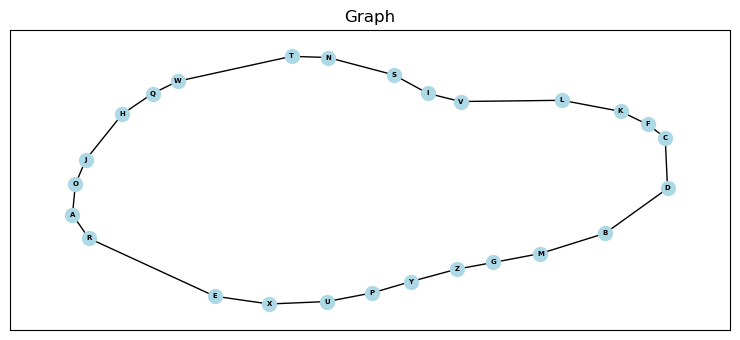

{'T': array([-0.23713651,  0.96442387]),
 'W': array([-0.59775866,  0.76646635]),
 'Q': array([-0.6769541 ,  0.66949275]),
 'H': array([-0.77263089,  0.50670581]),
 'J': array([-0.88812929,  0.14535016]),
 'O': array([-0.92144017, -0.0509331 ]),
 'A': array([-0.93051195, -0.29080334]),
 'R': array([-0.87915256, -0.47818572]),
 'E': array([-0.48048238, -0.93795464]),
 'X': array([-0.3082005, -1.       ]),
 'U': array([-0.12441101, -0.98044481]),
 'P': array([ 0.01838968, -0.91177714]),
 'Y': array([ 0.1401891 , -0.82227606]),
 'Z': array([ 0.28587575, -0.72361684]),
 'G': array([ 0.40110962, -0.6705734 ]),
 'M': array([ 0.55022916, -0.5998585 ]),
 'B': array([ 0.75517707, -0.43905963]),
 'D': array([ 0.95257022, -0.08353328]),
 'C': array([0.94527952, 0.31981979]),
 'F': array([0.88936395, 0.42397772]),
 'K': array([0.80378891, 0.52803703]),
 'L': array([0.61861089, 0.61572046]),
 'V': array([0.29755285, 0.60594918]),
 'I': array([0.1937898 , 0.67077876]),
 'S': array([0.08647647, 0.817

In [41]:
draw_graph(subG)

In [42]:
list(subG.edges)

[('T', 'W'),
 ('T', 'N'),
 ('W', 'Q'),
 ('Q', 'H'),
 ('H', 'J'),
 ('J', 'O'),
 ('O', 'A'),
 ('A', 'R'),
 ('R', 'E'),
 ('E', 'X'),
 ('X', 'U'),
 ('U', 'P'),
 ('P', 'Y'),
 ('Y', 'Z'),
 ('Z', 'G'),
 ('G', 'M'),
 ('M', 'B'),
 ('B', 'D'),
 ('D', 'C'),
 ('C', 'F'),
 ('F', 'K'),
 ('K', 'L'),
 ('L', 'V'),
 ('V', 'I'),
 ('I', 'S'),
 ('S', 'N')]

In [79]:
def animatePathCreation(G, pos):
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True

    fig = plt.figure(figsize=(10, 6))
    path = nx.Graph()
    path.add_nodes_from(G.nodes)
    connections = list(G.edges)
    #wrong order fix
    tmp = connections[1]
    connections.remove(tmp)
    connections.append(tmp)
    nx.draw_networkx(path, with_labels=True, pos = pos, node_color='lightblue', node_size=100, font_size=5, font_weight='bold')

    def animate(i):
        fig.clear()
        path.add_edges_from([connections[i]])
        nx.draw_networkx(path, with_labels=True, pos = pos, node_color='lightblue', node_size=100, font_size=5, font_weight='bold')

    ani = animation.FuncAnimation(fig, animate, frames=len(connections), interval=1000, repeat=True)
    ani.save("PathAnimation.gif")
    plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


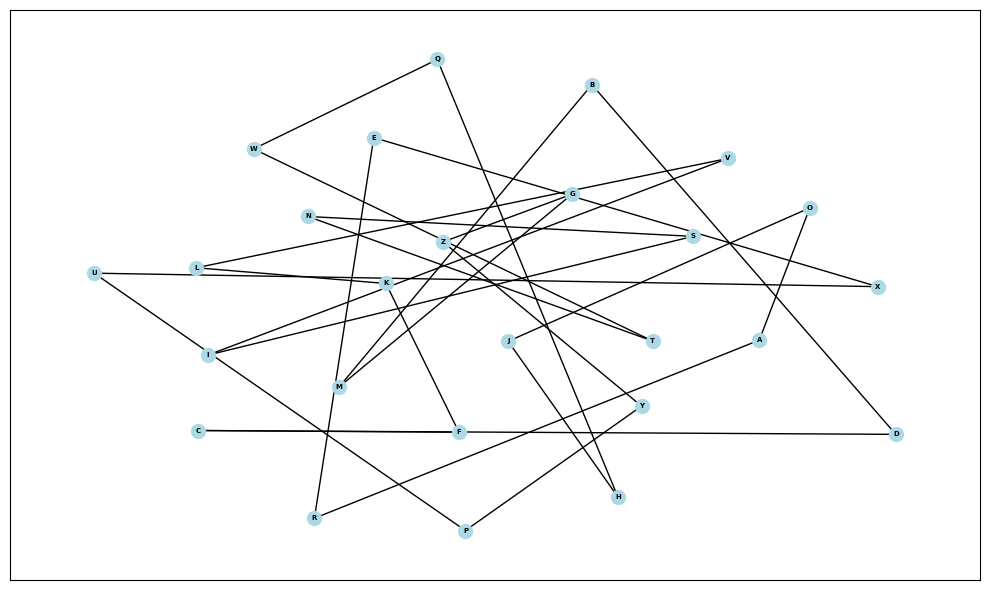

In [80]:
animatePathCreation(subG, originalLayout)

In [77]:
def animateTSM(G, paths, pos):
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True

    fig = plt.figure(figsize=(10, 6))
    path = nx.Graph()
    path.add_nodes_from(G.nodes)
    nx.draw_networkx(path, with_labels=True, pos = pos, node_color='lightblue', node_size=100, font_size=5, font_weight='bold')

    def animate(i):
        fig.clear()
        fig.suptitle("Index 0-19: " + str(i))
        constructedPath = constructPathGraph(G, paths[i])
        path.add_edges_from(list(constructedPath.edges))
        nx.draw_networkx(path, with_labels=True, pos = pos, node_color='lightblue', node_size=100, font_size=5, font_weight='bold')
        path.remove_edges_from(list(constructedPath.edges))
        
    ani = animation.FuncAnimation(fig, animate, frames=len(paths), interval=1000, repeat=True)
    ani.save("TSMAnimation.gif")
    plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


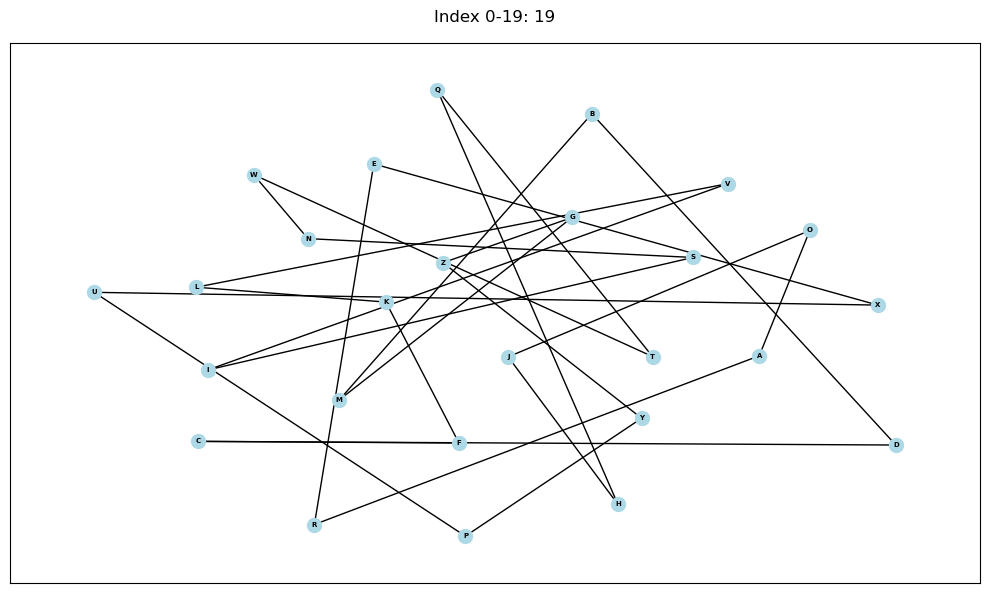

In [78]:
animateTSM(random_graph, sorted_nodes_array, originalLayout)